In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split


# To Train our data
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [4]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [85]:
from ml import Ml
from preprocess import Preprocess
from clean_data import CleanData

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df = pd.read_csv('ABtwoCampaignEngView.csv', engine = 'python')

In [3]:
df.head()

,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,1333639,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0.0,0.0
1,730667,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0.0,0.0
2,2069787,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,<built-in method date of Timestamp object at 0...,14,Apple,178,15,0.0,0.0
3,1692366,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,<built-in method date of Timestamp object at 0...,22,Apple,167,15,0.0,0.0
4,1384123,9428377d-1504-4407-87c2-ce518f67eb87,control,<built-in method date of Timestamp object at 0...,21,Samsung,155,15,0.0,0.0


In [15]:
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['Unnamed: 0', 'hour', 'platform_os', 'browser', 'yes', 'no']
****************
Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make']


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912712 entries, 0 to 912711
Data columns (total 10 columns):
Unnamed: 0     912712 non-null int64
auction_id     912712 non-null object
experiment     912712 non-null object
date           912712 non-null object
hour           912712 non-null int64
device_make    912712 non-null object
platform_os    912712 non-null int64
browser        912712 non-null int64
yes            912712 non-null float64
no             912712 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 69.6+ MB


In [80]:
ml = Ml()
pre = Preprocess()
clean = CleanData()

In [12]:
pre.get_missing_values(df)

Unnamed: 0     0
auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

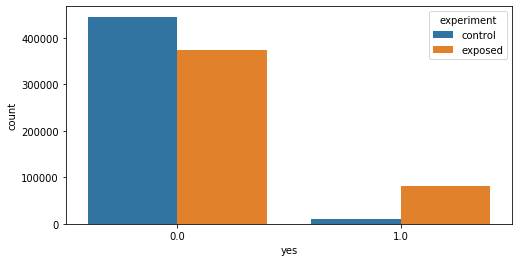

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(df.yes, hue=df.experiment)

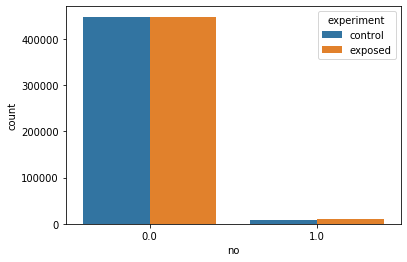

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(df.no, hue=df.experiment)

In [26]:
df.describe()

,Unnamed: 0,hour,platform_os,browser,yes,no
count,9.127120e+05,912712.000000,912712.000000,912712.000000,912712.000000,912712.000000
mean,1.196268e+06,10.648142,127.813321,8.211051,0.101645,0.019499
std,6.900511e+05,7.372631,32.217674,3.536780,0.302182,0.138271
min,1.000000e+00,0.000000,101.000000,1.000000,0.000000,0.000000
25%,5.989198e+05,4.000000,101.000000,6.000000,0.000000,0.000000
50%,1.196384e+06,10.000000,101.000000,7.000000,0.000000,0.000000
75%,1.793652e+06,17.000000,162.000000,7.000000,0.000000,0.000000
max,2.391777e+06,23.000000,181.000000,15.000000,1.000000,1.000000


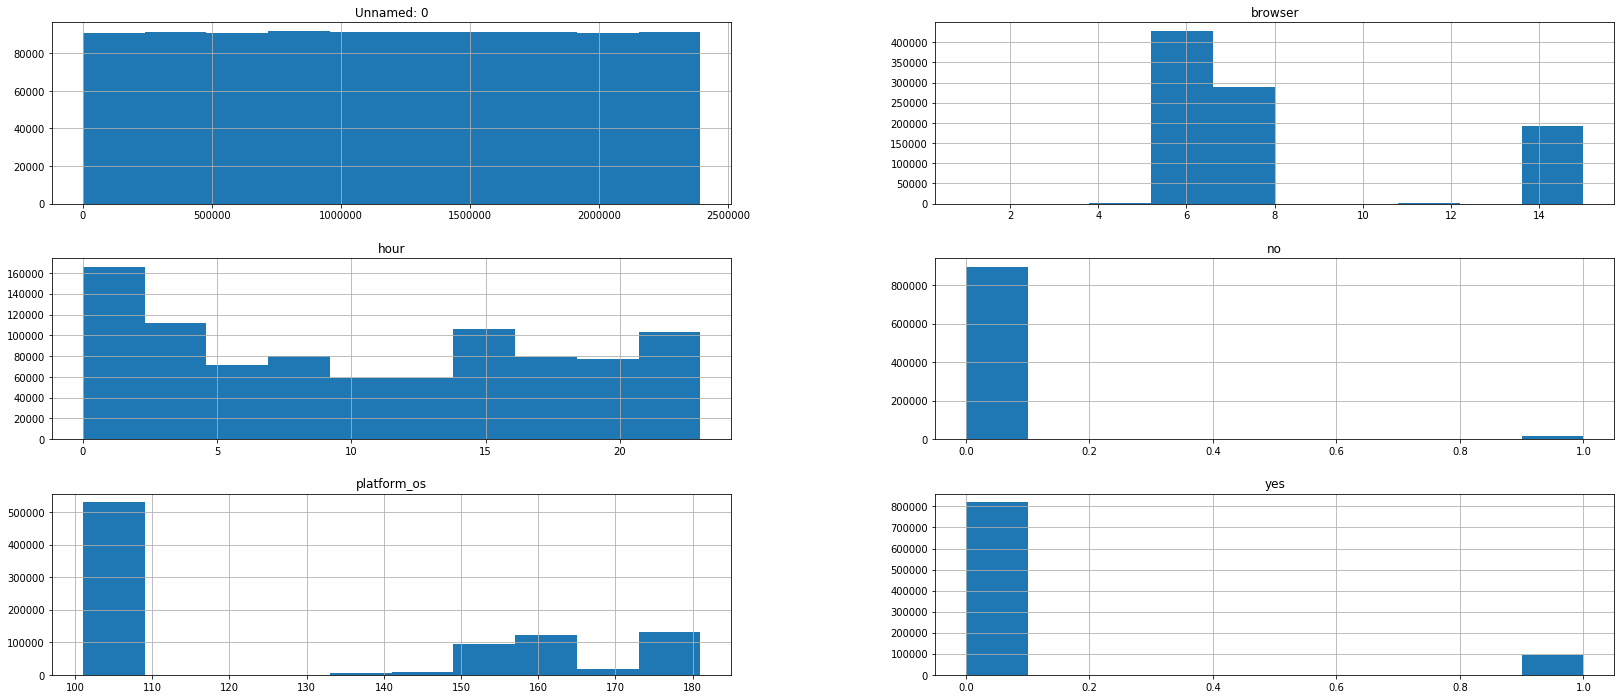

In [27]:
df.hist(bins=10, figsize=(28,12))
plt.show()

In [29]:
df['device_make'].value_counts().head()

Apple       474242
Samsung     285995
Google       75269
Motorola     26179
LG           20368
Name: device_make, dtype: int64

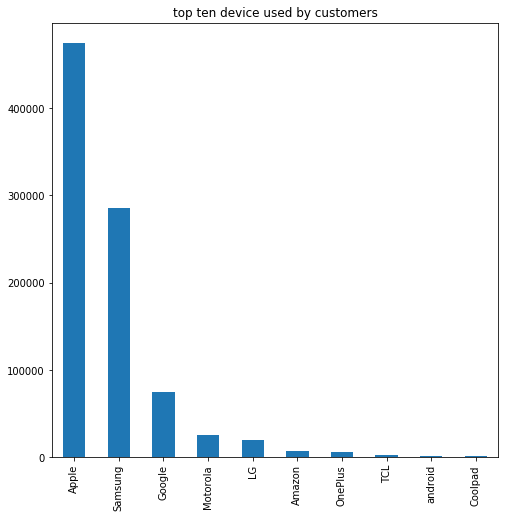

In [40]:
device_make = pd.Series(df['device_make'].value_counts()).head(10)
device_make.plot(kind="bar", title="top ten device used by customers", figsize=[8, 8])

# the most device_make by people were involoved in the experiment were Apple, Samsung and Google respectiviely 

In [31]:
df['platform_os'].value_counts().head()

101    529469
162    118039
178     77651
156     48979
155     39381
Name: platform_os, dtype: int64

In [33]:
df['browser'].value_counts().head()

6     427413
7     289305
15    191935
5       2715
12       870
Name: browser, dtype: int64

In [34]:
df[(df['yes'] == 0) & (df['no'] == 0)].shape

(802142, 10)

# more than 80% involved in the experiment neither said yes or no

In [38]:
df = df.drop('date', axis = 1)
df

,Unnamed: 0,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
0,1333639,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,15,LG,156,6,0.0,0.0
1,730667,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,7,Samsung,162,6,0.0,0.0
2,2069787,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,14,Apple,178,15,0.0,0.0
3,1692366,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,22,Apple,167,15,0.0,0.0
4,1384123,9428377d-1504-4407-87c2-ce518f67eb87,control,21,Samsung,155,15,0.0,0.0
...,...,...,...,...,...,...,...,...,...
912707,1426994,98c10ba3-932f-4feb-ad01-d1b549dbd905,exposed,14,Samsung,162,15,0.0,1.0
912708,1846194,c591dcc1-2526-4caa-8561-0f9da1fe565b,exposed,8,Samsung,162,15,0.0,0.0
912709,2133458,e44046fa-0d3e-4680-99a8-f8d2167890f4,exposed,5,Apple,101,7,0.0,0.0
912710,1815799,c25657c2-f1b6-4f50-9610-9f3bbef2594d,exposed,14,Samsung,101,6,1.0,0.0


In [39]:
pd.Series(df['experiment'].value_counts())

control    456356
exposed    456356
Name: experiment, dtype: int64

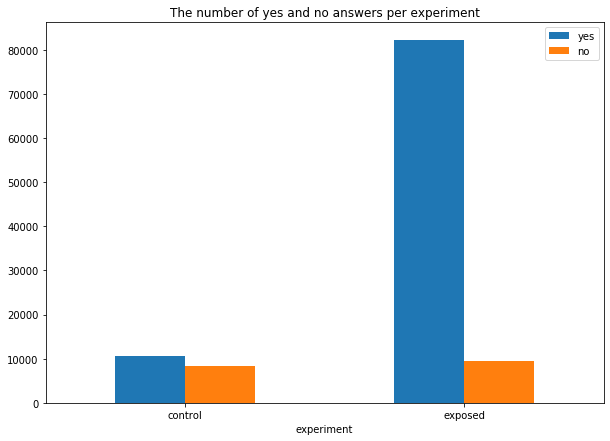

In [42]:
yes_no_agg = df.groupby('experiment').agg({'yes': 'sum', 'no': 'sum'})
ax = yes_no_agg.plot.bar( y=['yes', 'no'],  title="The number of yes and no answers per experiment",
                          rot=0, figsize=(10,7))

# the number of 'yes' for the exposed group is 8 times more than the control group 

In [56]:
relevant_rows = df.query('yes == 1 | no == 1')
#changing the targeted colums into 1 col
df2 = relevant_rows.drop('no', axis=1)

In [57]:
#renaming col because 0 means no and 1 means yes
df2.rename(columns = {'yes': 'brand_awarness'}, inplace=True)
df2

,Unnamed: 0,auction_id,experiment,hour,device_make,platform_os,browser,brand_awarness
80,2201667,eb941471-f485-4516-b4d3-648e7838d53a,control,15,Apple,101,15,1.0
84,917467,622af8e2-7bcf-4681-a921-442e1f8378f1,control,6,Apple,101,5,1.0
103,809779,56a03982-6278-4083-9554-3a069dbc22c8,control,20,Samsung,162,6,1.0
180,105739,0b4b114a-7be3-435e-beb5-76cbd29ae329,control,8,Apple,101,15,0.0
209,365586,2711e2f3-a624-4243-800e-693a888bc394,control,3,Samsung,162,6,1.0
...,...,...,...,...,...,...,...,...
912689,179354,13225de7-c02c-4b14-ad98-e9edf334054b,exposed,23,Apple,178,7,0.0
912698,1471812,9d89a204-2c70-465d-b59c-bc13adc855a5,exposed,14,Samsung,101,6,1.0
912706,664223,46f508f0-4fd5-4cf8-8f80-49ae3d2d27d1,exposed,3,Samsung,101,6,1.0
912707,1426994,98c10ba3-932f-4feb-ad01-d1b549dbd905,exposed,14,Samsung,162,15,0.0


In [62]:
df2.drop('auction_id', axis = 1, inplace=True)
# df2.drop('Unnamed: 0', axis = 1, inplace=True)
df2

,hour,device_make,platform_os,browser,brand_awarness,control,exposed
80,15,Apple,101,15,1.0,1,0
84,6,Apple,101,5,1.0,1,0
103,20,Samsung,162,6,1.0,1,0
180,8,Apple,101,15,0.0,1,0
209,3,Samsung,162,6,1.0,1,0
...,...,...,...,...,...,...,...
912689,23,Apple,178,7,0.0,0,1
912698,14,Samsung,101,6,1.0,0,1
912706,3,Samsung,101,6,1.0,0,1
912707,14,Samsung,162,15,0.0,0,1


In [59]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df2['experiment'])
# Drop column B as it is now encoded
df2 = df2.drop('experiment',axis = 1)
# Join the encoded df
df2 = df2.join(one_hot)
df2 

,auction_id,hour,device_make,platform_os,browser,brand_awarness,control,exposed
80,eb941471-f485-4516-b4d3-648e7838d53a,15,Apple,101,15,1.0,1,0
84,622af8e2-7bcf-4681-a921-442e1f8378f1,6,Apple,101,5,1.0,1,0
103,56a03982-6278-4083-9554-3a069dbc22c8,20,Samsung,162,6,1.0,1,0
180,0b4b114a-7be3-435e-beb5-76cbd29ae329,8,Apple,101,15,0.0,1,0
209,2711e2f3-a624-4243-800e-693a888bc394,3,Samsung,162,6,1.0,1,0
...,...,...,...,...,...,...,...,...
912689,13225de7-c02c-4b14-ad98-e9edf334054b,23,Apple,178,7,0.0,0,1
912698,9d89a204-2c70-465d-b59c-bc13adc855a5,14,Samsung,101,6,1.0,0,1
912706,46f508f0-4fd5-4cf8-8f80-49ae3d2d27d1,3,Samsung,101,6,1.0,0,1
912707,98c10ba3-932f-4feb-ad01-d1b549dbd905,14,Samsung,162,15,0.0,0,1


In [61]:
pre.get_missing_values(df)

Unnamed: 0     0
auction_id     0
experiment     0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [63]:
le = LabelEncoder()
df2['device_make'] = le.fit_transform(df2['device_make']) 

In [64]:
df2

,hour,device_make,platform_os,browser,brand_awarness,control,exposed
80,15,7,101,15,1.0,1,0
84,6,7,101,5,1.0,1,0
103,20,60,162,6,1.0,1,0
180,8,7,101,15,0.0,1,0
209,3,60,162,6,1.0,1,0
...,...,...,...,...,...,...,...
912689,23,7,178,7,0.0,0,1
912698,14,60,101,6,1.0,0,1
912706,3,60,101,6,1.0,0,1
912707,14,60,162,15,0.0,0,1


In [66]:
pre.get_missing_values(df2)

hour              0
device_make       0
platform_os       0
browser           0
brand_awarness    0
control           0
exposed           0
dtype: int64

In [96]:
# splitting colmuns int independent and dependent varibles
y = df2['brand_awarness']
X = df2.drop(["brand_awarness"], axis=1)

In [97]:
col_name = X.columns.values.tolist()

In [71]:
y

80        1.0
84        1.0
103       1.0
180       0.0
209       1.0
         ... 
912689    0.0
912698    1.0
912706    1.0
912707    0.0
912710    1.0
Name: brand_awarness, Length: 110570, dtype: float64

In [73]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [74]:
#spliting the 10 percent for the test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [75]:
#spliting the 20 percent for the validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.23)

# Logistic Regression

In [86]:
logReg = LogisticRegression()
ml.cross_validation(logReg, X_train, y_train)

{'Training Accuracy scores': array([0.84411093, 0.84350734, 0.84355628, 0.84331158, 0.84398042]),
 'Mean Training Accuracy': 84.36933115823815,
 'Training Precision scores': array([0.86476608, 0.86434898, 0.86435606, 0.86413053, 0.86427802]),
 'Mean Training Precision': 0.8643759318430047,
 'Training Recall scores': array([0.96530152, 0.96508781, 0.9651461 , 0.9651461 , 0.96586494]),
 'Mean Training Recall': 0.96530929437364,
 'Training F1 scores': array([0.91227233, 0.91194478, 0.91197474, 0.91184919, 0.91225205]),
 'Mean Training F1 Score': 0.9120586178471571,
 'Validation Accuracy scores': array([0.8422186 , 0.84404568, 0.84417618, 0.84541599, 0.84267537]),
 'Mean Validation Accuracy': 84.37063621533441,
 'Validation Precision scores': array([0.86309937, 0.86392053, 0.86439499, 0.86564045, 0.86488939]),
 'Mean Validation Precision': 0.8643889480779837,
 'Validation Recall scores': array([0.96518495, 0.96650606, 0.96596208, 0.96580665, 0.96308673]),
 'Mean Validation Recall': 0.96530

### the training mean accuracy is 84%

In [88]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logReg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 351 1405]
 [ 308 8993]]


0.8450755177715474

## the test score is 84% 

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
y_pred = logReg.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**.5
print("mean_squared_error : {:.2f} %".format(mse))
print("Root Mean Squared Error: {:.2f} %".format(rmse))

mean_squared_error : 0.16 %
Root Mean Squared Error: 0.40 %


hour , Score: -0.10518
device_make , Score: 0.67343
platform_os , Score: -0.20742
browser , Score: -0.19166
control , Score: -0.22228
exposed , Score: 0.22228


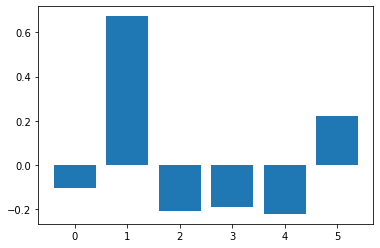

In [99]:
# get importance
importance = logReg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print(col_name[i], ', Score: %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# the most important feature for training logestic regression

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 532 1224]
 [ 468 8833]]


0.8469747671158542

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
y_pred = dtc.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**.5
print("mean_squared_error : {:.2f} %".format(mse))
print("Root Mean Squared Error: {:.2f} %".format(rmse))

mean_squared_error : 0.16 %
Root Mean Squared Error: 0.40 %


hour , Score: 0.14235
device_make , Score: 0.64545
platform_os , Score: 0.12451
browser , Score: 0.03866
control , Score: 0.01690
exposed , Score: 0.03213


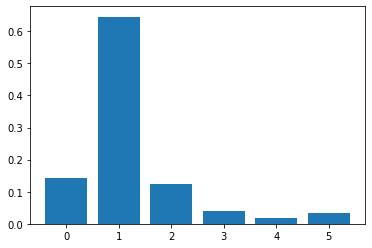

In [98]:
importance = dtc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(col_name[i], ', Score: %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# the more important feature for training decesion trees is device make

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f} %".format(accuracy_score(y_test, y_pred)))

[[ 501 1255]
 [ 412 8889]]
Accuracy Score: 0.85 %


In [103]:
#doing k-fold cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.00 %
Standard Deviation: 0.20 %


In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
y_pred = rfc.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**.5
print("mean_squared_error : {:.2f} %".format(mse))
print("Root Mean Squared Error: {:.2f} %".format(rmse))

mean_squared_error : 0.15 %
Root Mean Squared Error: 0.39 %


hour , Score: 0.18481
device_make , Score: 0.37272
platform_os , Score: 0.12563
browser , Score: 0.07973
control , Score: 0.19081
exposed , Score: 0.04630


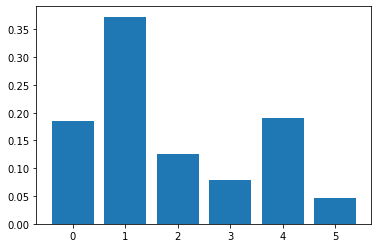

In [105]:
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(col_name[i], ', Score: %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### the most important feature for training the was 'device_make' for all models
#### the accuracy for the training data was similiar to the test data meaning the model was able to generalize which is a good thing
#### for this data there was no problem with overfitting 
# the mean squared
# the number of yes being more greater than the number of 'no' in brand awareness and having an 85% accuracy shows that the creative ad designed has a siginificant impact on brand awareness. In the overall it was sucessful on creating more brand awareness